### 지도학습 절차

- 지도학습 : 목표변수(Y)와 설명변수(X)의 관계를 학습해서, 새로운 X가 들어올 때, Y를 예측 / 분류

- 지도학습의 절차 6단계:
  1. 데이터 핸들링 (데이터 불러오기 / 파생변수 생성 / 층별화) : 데이터 구조적인 관점에서 학습을 수행할 수 있는 데이터셋을 구성하는 과정

  2. 학습에 사용될 목표변수(Y)와 설명변수(X)를 설정
    - 유의사항 : 사용되는 X는 새로 들어올 데이터에 대한 값으로 지정 ex. 신규고객 이탈 예측을 할 때 구매횟수와 방문횟수를 넣으면 안 됨.

  3. 학습 데이터(Train Set)와 검증 데이터(Test Set)분할
    - 검증 데이터(Test Set)는 학습에 참여하지 않는다! (교차검증에서 Validation Set과는 다른 개념)

  4. 학습을 수행 (Modeling)
    - 특성공학 (결측값 처리 / Encoding / Scaling ...) -> Pipe Line을 이용해서
    - 학습 (알고리즘)

  5. 학습된 모델 평가
    - 학습 능력 평가
    - 일반화 능력 평가


In [1]:
# 라이브러리 불러오기
import pandas as pd
import numpy as np

- 사용한 데이터 (https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database)

In [2]:
# 데이터 불러오기
df1 = pd.read_csv('diabetes.csv')
print(df1.shape)
print(df1.info())
print(df1.head())
print(df1.tail())

(768, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2         

In [3]:
# 환자의 건강 관련 정보를 입력했을 때, 당뇨병에 걸릴지 말지에 대한 판별 모델 생성
# 1) 데이터 핸들링
df1['Outcome'].unique()

array([1, 0])

In [7]:
df1.describe

<bound method NDFrame.describe of      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627  

In [45]:
df1.value_counts("Outcome")

Outcome
0    355
1    177
Name: count, dtype: int64

## **결측치는 없지만 0이 나올 수 있는 변수와 아닌 변수를 구분해서 EDA 할 것**

## **Pregrance**
 - 임신횟수

In [ ]:
# 셀 추가해서 EDA 하기

<Axes: >

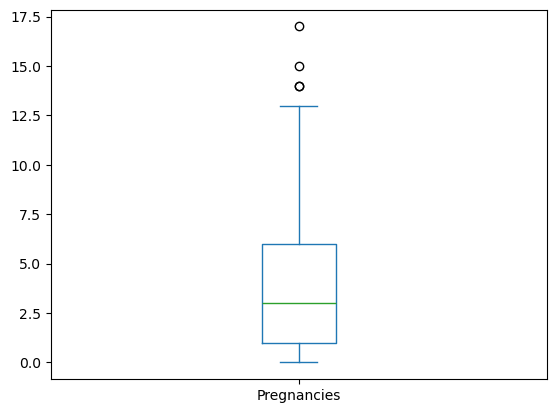

In [11]:
df1.describe()
df1[["Pregnancies"]].plot(kind="box")

### **변수 인사이트 정리**

## **glucose**
- 혈장 포도당 농도
- 사람 혈당이 0일 수는 없다.
- 당뇨는 혈당이 지속적으로 높은 증상

In [ ]:
# 셀 추가해서 EDA 하기

In [21]:
df1 = df1[df1.Glucose != 0]
df1.value_counts("Glucose")


Glucose
100    17
99     17
106    14
129    14
125    14
       ..
67      1
65      1
62      1
61      1
199     1
Name: count, Length: 135, dtype: int64

<Axes: ylabel='Frequency'>

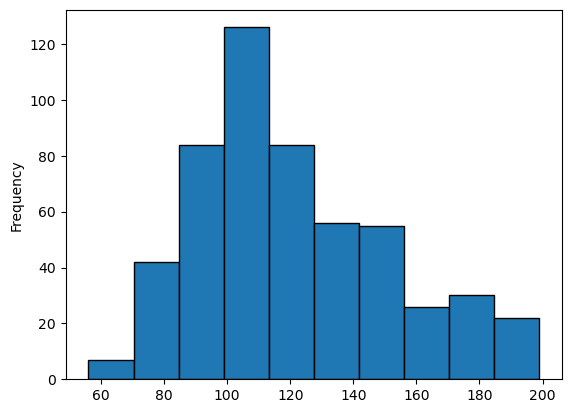

In [54]:
glu = df1["Glucose"]
glu.plot(kind="hist",edgecolor="black")

### **변수 인사이트 정리**

#건강한 사람의 혈당 수치는 80~130, 저혈당은 70이하, 고혈당은 180 이상에 해당한다. 

## **bloodpressure**
- 혈압
- 혈압도 0일 수는 없다 

In [ ]:
# 셀 추가해서 EDA 하기

In [22]:
df1 = df1[df1.BloodPressure != 0]
df1.value_counts("BloodPressure")

BloodPressure
70     57
74     51
78     45
72     44
64     43
68     43
80     39
76     39
60     37
62     34
82     30
66     30
88     25
84     23
90     22
86     21
58     21
50     13
56     12
52     11
54     11
92      8
75      8
65      7
85      6
94      6
48      4
44      4
96      4
110     3
106     3
98      3
100     3
30      2
104     2
108     2
55      2
46      2
114     1
24      1
102     1
95      1
61      1
40      1
38      1
122     1
Name: count, dtype: int64

<Axes: ylabel='Frequency'>

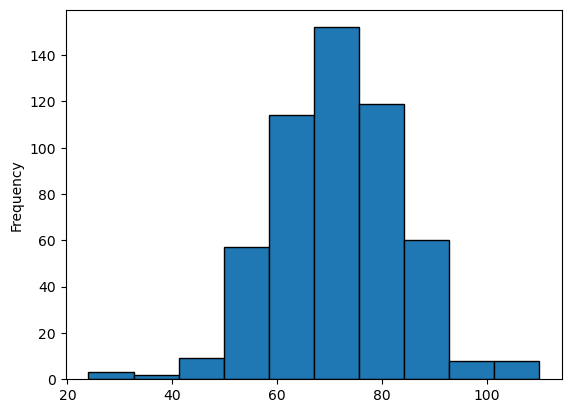

In [55]:
bp = df1["BloodPressure"]
bp.plot(kind="hist",edgecolor="black")

### **변수 인사이트 정리**

#일부 환자에게서 너무 낮은 수치의 혈압이 측정되었다.

## **SkinThickness**
- 삼두근 피부 두께
- 체지방이란 관련이 있다.
- 0일 수 없다

In [ ]:
# 셀 추가해서 EDA 하기

In [23]:
df1 = df1[df1.SkinThickness != 0]
df1.value_counts("SkinThickness")

SkinThickness
32    30
30    26
27    23
23    21
33    20
18    20
28    20
31    19
39    18
19    18
29    17
22    16
40    16
37    16
25    16
26    16
17    14
36    14
41    14
35    14
15    14
24    12
13    11
20    11
42    11
21    10
46     8
34     8
12     7
38     7
14     6
11     6
45     6
16     6
43     6
44     5
10     5
47     4
48     4
49     3
50     3
52     2
54     2
7      2
8      2
51     1
56     1
60     1
63     1
99     1
Name: count, dtype: int64

<Axes: ylabel='Frequency'>

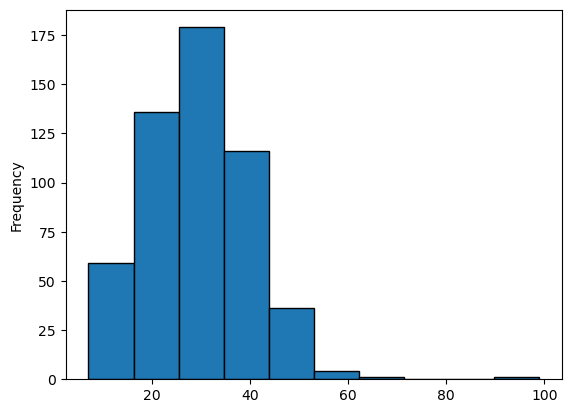

In [56]:
st = df1["SkinThickness"]
st.plot(kind="hist",edgecolor="black")

### **변수 인사이트 정리**

## **Insulin**
- 인슐린 분비량
- 당뇨병 유형은 인슐린이 선천적으로 나오지 않는 사람(1형)과 인슐린이 나오지만 인식을 못하는 사람(2형) 당뇨병 두가지가 있다.  

In [ ]:
# 셀 추가해서 EDA 하기

In [43]:
df1.value_counts("Insulin")

Insulin
0      140
105     11
130      9
140      9
120      8
      ... 
52       1
193      1
191      1
188      1
846      1
Name: count, Length: 185, dtype: int64

<Axes: >

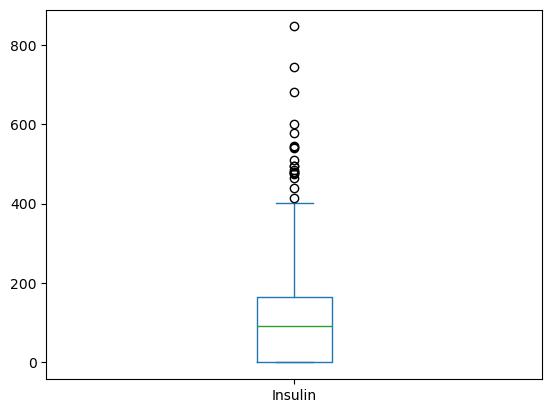

In [44]:
df1[["Insulin"]].plot(kind="box")

<Axes: ylabel='Frequency'>

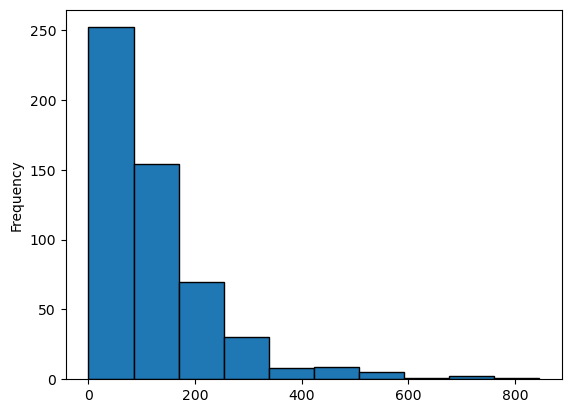

In [57]:
ins = df1["Insulin"]
ins.plot(kind="hist",edgecolor="black")

### **변수 인사이트 정리**


## **BMI**
- 0이 나올 수 없는 값

In [5]:
# 셀 추가해서  EDA 하기

In [27]:
df1 = df1[df1.BMI != 0]
df1.value_counts("BMI")

BMI
32.0    10
31.6     9
33.6     8
29.7     7
33.3     7
        ..
37.5     1
37.3     1
37.0     1
25.8     1
67.1     1
Name: count, Length: 222, dtype: int64

<Axes: ylabel='Frequency'>

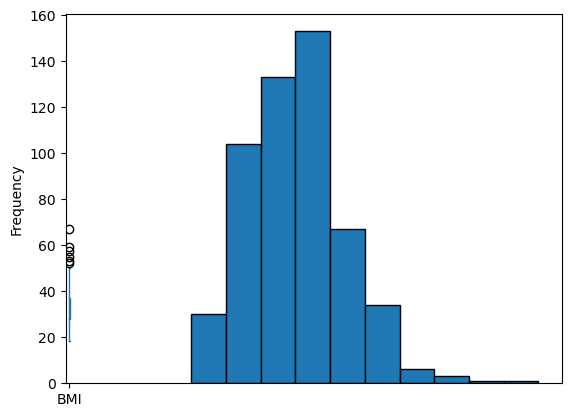

In [60]:
bmi = df1["BMI"]
bmi.plot(kind="hist",edgecolor="black")

<Axes: >

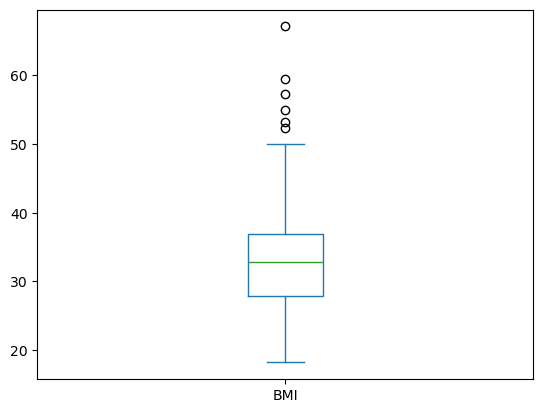

In [61]:
bmi.plot(kind="box")

In [46]:
df1.info

<bound method DataFrame.info of      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
6              3       78             50             32       88  31.0   
..           ...      ...            ...            ...      ...   ...   
761            9      170             74             31        0  44.0   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome Age.cat  
0                       0

### **변수 인사이트 정리**

## **파생변수 생성 및 추가 전처리**

In [ ]:
# 셀 추가해서 하기

# **모델링하기**

In [62]:
# 2) 목표변수 / 설명변수 설정
# 파생 변수는 추가하고, 필요 없는 변수는 빼기

X = df1[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']]
Y = df1['Outcome'] # Y값에는 결측치가 존재해서는 안됨

In [63]:
# 3) 학습데이터와 검증데이터를 분할
# pip install scikit-learn
from sklearn.model_selection import train_test_split

In [64]:
train_test_split(X,Y) # X 데이터의 학습, 검증 데이터 & Y 데이터의 학습, 검증데이터 4개로 분리됨

[     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
 156            2       99             52             15       94  24.6   
 441            2       83             66             23       50  32.2   
 412            1      143             84             23      310  42.4   
 738            2       99             60             17      160  36.6   
 702            1      168             88             29        0  35.0   
 ..           ...      ...            ...            ...      ...   ...   
 262            4       95             70             32        0  32.1   
 712           10      129             62             36        0  41.2   
 85             2      110             74             29      125  32.4   
 652            5      123             74             40       77  34.1   
 427            1      181             64             30      180  34.1   
 
      DiabetesPedigreeFunction  Age  
 156                     0.637   21  
 441                  

In [65]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=1234)
# train_test_split()에 별도의 옵션을 지정하지 않으면 75:25로 학습:검증 분할됨
# random_state을 지정해야 같은 결과가 나옴

In [66]:
X.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
dtype: int64

=> X에도 결측치가 없는 데이터이지만, 추후 새로 들어올 데이터에 결측치가 존재할 수 있음

# **각자 공부한 모델 쓰기**

In [69]:
# 4) 학습 수행
from sklearn.ensemble import GradientBoostingClassifier

In [70]:
model = GradientBoostingClassifier()
model.fit(X_train, Y_train) # 학습 수행

,loss,'log_loss'
,learning_rate,0.1
,n_estimators,100
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,3
,min_impurity_decrease,0.0
,init,None


In [71]:
# 5) 성능 확인
from sklearn.metrics import accuracy_score
# 정확도 : 전체 데이터 중 얼만큼 정확히 분류했는지 비율

In [72]:
Y_train_pred = model.predict(X_train)

In [73]:
Y_test_pred = model.predict(X_test)

In [74]:
print('학습 정확도 : ', accuracy_score(Y_train, Y_train_pred)) # 여러 알고리즘에 대한 모델을 비교할 때 확인해야 함
print('검증 정확도 : ', accuracy_score(Y_test, Y_test_pred))

학습 정확도 :  0.9699248120300752
검증 정확도 :  0.8120300751879699


### 과적합(Overfitting)

- 과적합 : 학습 데이터에 대해서는 Model이 높은 성능을 나타내지만, 검증데이터에서는 성능이 낮게 나오는 현상
- 해결 : 특성공학을 통해 데이터를 더 깔끔하게 생성

### 특성공학(Feature Engineering)
- **특성공학** : 학습의 목적에 맞게(학습이 잘 수행될 수 있도록) 데이터를 깔끔하게 다듬는 작업
- 대표적 기법 : 
  1. Scaling & Encoding : 숫자 데이터의 스케일을 맞추거나, 문자 데이터를 숫자로 변환하여 학습에 사용
  2. Imputation : 데이터 상에 존재하는 결측값에 대해 다른 값으로 대치 (새로 들어오는 데이터가 결측일 수도 있기 때문에)
  3. Cross Validation (교차검증): 학습데이터를 여러 단계로 나누어 분할하여 학습
  4. Hyper Parameter Tuning : 학습 알고리즘 내 존재하는 수학적 구조나 학습에 발생하는 구조, 함수들을 사용자가 통제
  5. Imbalanced Data Sampling : 목표변수의 비율이 깨져있는 데이터를 맞추어 학습
  6. Feature Selection : 목표변수에 가장 영향이 있는 인자를 사용자가 지정한 만큼 선택해서 학습
  7. PCA : 데이터의 차원을 줄이거나 특성을 재구성하여 학습

- Scikit Learn에서 특성공학 기법과 학습을 동시에 수행할 수 있게 Pipe Line 구성하여 학습을 수행

In [75]:
# 4) 학습 수행
from sklearn.pipeline import make_pipeline # 특성공학 + 학습
from sklearn.impute import SimpleImputer # 결측값 단순 대치 기법
from sklearn.tree import DecisionTreeClassifier # 학습 알고리즘(의사결정나무)
from sklearn.preprocessing import StandardScaler #Standard Scaling

In [77]:
# 파이프라인 구조 설계
#스케일링 하고 싶으면 StandardScaler() 사용

model_pipe = make_pipeline(StandardScaler(),GradientBoostingClassifier())
model_pipe

,steps,"[('standardscaler', ...), ('gradientboostingclassifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,loss,'log_loss'
,learning_rate,0.1
,n_estimators,100
,subsample,1.0


In [78]:
from sklearn.model_selection import GridSearchCV

#### **공부한 모델의 하이퍼파라미터**

- 여기에 정리하기
- ex: 하이퍼 파라미터의 종류는 ~~가 있고, 값을 키우면 과적합이 발생할 수 있다.


In [80]:
# 하이퍼파라미터 튜닝 및 교차검증
hyperparam = {'gradientboostingclassifier__n_estimators': [100, 200],'gradientboostingclassifier__max_depth': [3, 5],
             'gradientboostingclassifier__learning_rate': [0.05, 0.1],'gradientboostingclassifier__min_samples_split': [2, 5]}

grid_model1 = GridSearchCV(model_pipe, param_grid = hyperparam, cv=3,
                          scoring='f1', n_jobs=-1)
grid_model1.fit(X_train, Y_train)
best_model1 = grid_model1.best_estimator_

In [81]:
best_model1

,steps,"[('standardscaler', ...), ('gradientboostingclassifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,loss,'log_loss'
,learning_rate,0.05
,n_estimators,200
,subsample,1.0


In [82]:
# 5) 평가
Y_train_pred = best_model1.predict(X_train) # 학습 데이터의 예측값 계산
Y_test_pred = best_model1.predict(X_test) # 검증데이터의 예측값 계산

In [83]:
from sklearn.metrics import classification_report

In [84]:
# 학습 성능 평가
print(classification_report(Y_train, Y_train_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98       265
           1       0.98      0.93      0.95       134

    accuracy                           0.97       399
   macro avg       0.97      0.96      0.96       399
weighted avg       0.97      0.97      0.97       399



In [85]:
# 일반화 성능 평가
print(classification_report(Y_test, Y_test_pred))

              precision    recall  f1-score   support

           0       0.85      0.84      0.85        90
           1       0.68      0.70      0.69        43

    accuracy                           0.80       133
   macro avg       0.77      0.77      0.77       133
weighted avg       0.80      0.80      0.80       133



# **성능을 높이기 위한 방안**

1. test 데이터의 정확도가 test 데이터의 정확도보다 많이 낮으면 과적합
2. 하이퍼파라미터 튜닝, 추가적인 전처리(변수 제거) 혹은 파생변수 생성 으로 이를 해결 할 수 있다.  